# Project Business Statistics: E-news Express

**Marks: 60**

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Reading the Data into a DataFrame

In [52]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [53]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [54]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [55]:
df.shape

(100, 6)

* There are 100 rows and 6 columns in the dataset.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 3 types of data in the dataset:
* int64: 'user_id'
* float64: 'time_spent_on_the_page'
* object: 'group', 'landing_page', 'converted', 'language_preferred'

In [57]:
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

* In the numerical variable, 'time_spent_on_the_page', the mean is close to the median (50th percentile). It suggests that the data is approximately normally distributed or symmetrically distributed. We will further investigate it through visualization and statistical tests below.
*  The IQR (the difference between the 75th and 25th percentile values) is between 3.88 and 7.02. Assuming it is a normal distribution, approximately 68% of the data falls within one standard deviation of the mean. Due to this rule, a standard deviation of 2.378 suggests that approximately 68% of users spent between 3.88 -7.02 minutes on the page, with some spending more or less time.
* The minimum value is 0.19, which indicates that there is at least one observation where the user spent only 0.19 minutes on the page.
* The maximum value is  10.71, which indicates that there is at least one observation where the user spent as much as 10.71 minutes on the page.

In [58]:
df.describe(include="object").T


,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


For the categorical variables, there are 2 unique values in 'group', 'landing_page', 'converted', and 3 unique values in 'langugae_preferred'. We will further investigate them below.

In [59]:
df.isna().sum()


user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There is no missing values in the data.

In [60]:
df.duplicated().sum()


0

* There is no duplicated values in the data.

### Univariate Analysis

#### Observations on 'time spent on the page'

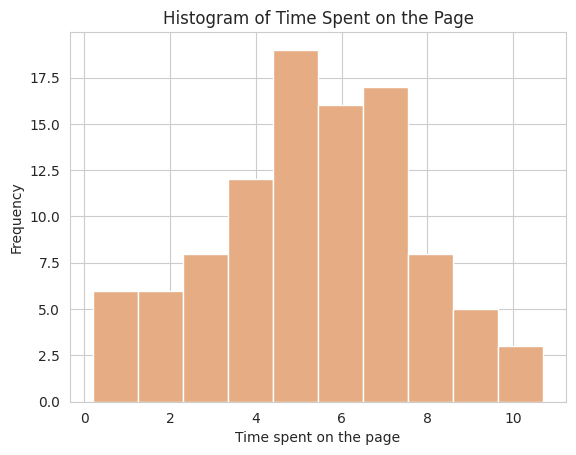

In [61]:
# Create a histogram of time_spent_on_the_page with 10 bins and set the color to #e6ac83
plt.hist(df['time_spent_on_the_page'], bins=10, color='#e6ac83')

# Add labels and title
plt.xlabel('Time spent on the page')
plt.ylabel('Frequency')
plt.title('Histogram of Time Spent on the Page')

# Show the plot
plt.show()

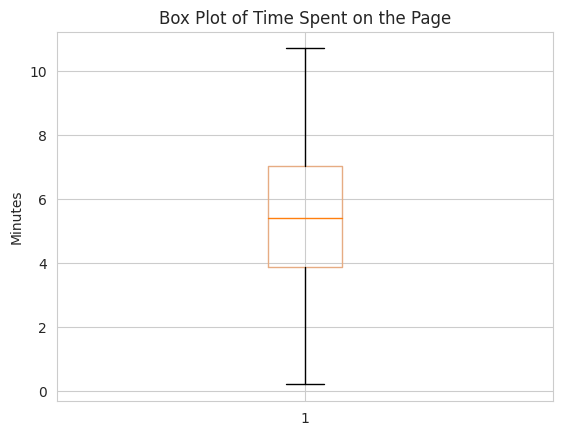

In [62]:
# Create a box plot of time_spent_on_the_page with the box color set to #e6ac83
plt.boxplot(df['time_spent_on_the_page'], boxprops=dict(color='#e6ac83'))

# Add labels and title
plt.ylabel('Minutes')
plt.title('Box Plot of Time Spent on the Page')

# Show the plot
plt.show()

From the histogram and boxplot above, we can see that in the 'time_spent_on_the_page' column:
* there is no outliers.
* it appears to have a roughly symmetric distribution, with most users spending between 3.88 and 7.02 minutes on the page.

####Observations on 'group'

In [63]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

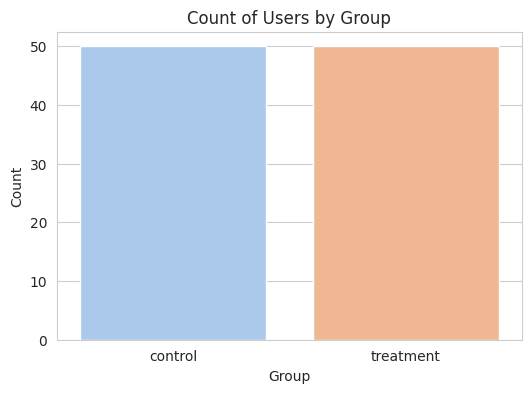

In [64]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='group', palette='pastel')
plt.title('Count of Users by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

* The users are divided into two groups: control and treatment. 
* There are 50 users in the control group and 50 users in the treatment group. 
* This indicates that the sample has been randomly split into two equal-sized groups, with each group having an equal chance of being assigned to the control or treatment condition. 

#### Observations on 'landing page'

In [65]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

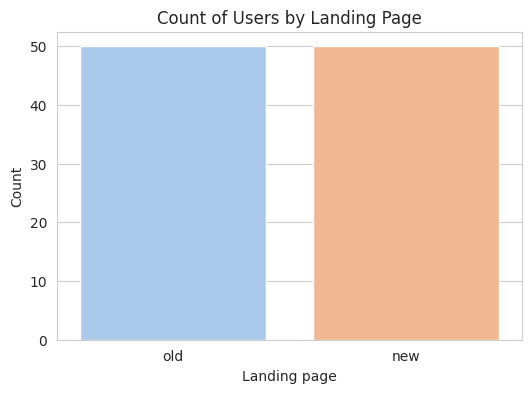

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='landing_page', palette='pastel')
plt.title('Count of Users by Landing Page')
plt.xlabel('Landing page')
plt.ylabel('Count')
plt.show()

* 50 users' landing page is the old (existing) version and 50 users' landing page is the new version.
* This indicates that the sample has been randomly split into two equal-sized groups, with each group having an equal chance of being assigned to the old or new landing page.

#### Observations on 'converted'

In [67]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

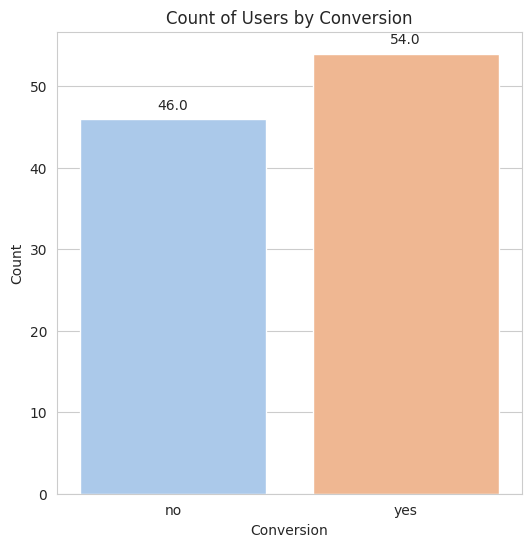

In [68]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df, x='converted', palette='pastel')
plt.title('Count of Users by Conversion')
plt.xlabel('Conversion')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

From the above plot, we see that out of 100 users, 54 of them converted while 46 did not. This implies that the conversion rate is 54% of user gets converted to a subscriber of the news portal.

#### Observations on 'language preferred'

In [69]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

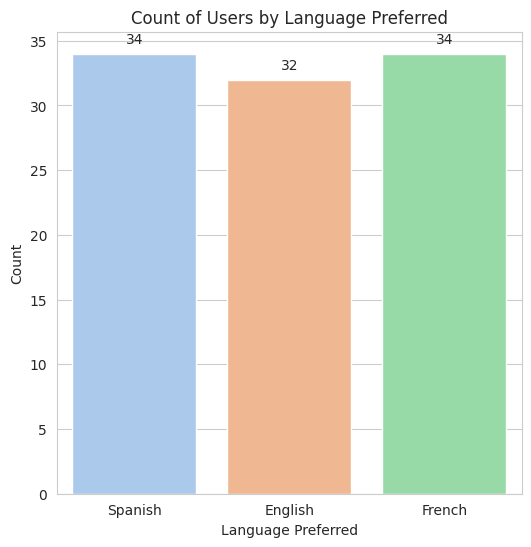

In [70]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df, x='language_preferred', palette='pastel')
plt.title('Count of Users by Language Preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

* The above plot shows that the users are fairly evenly distributed among the three language options. Three unique values - Spanish, French, and English occurs with a frequency of 34, 34, and 32, respectively. 
* We will further investigate whether there are any differences in conversion rates or time spent on the page based on language preference. 

### Bivariate Analysis

#### Landing page vs Time spent on the page

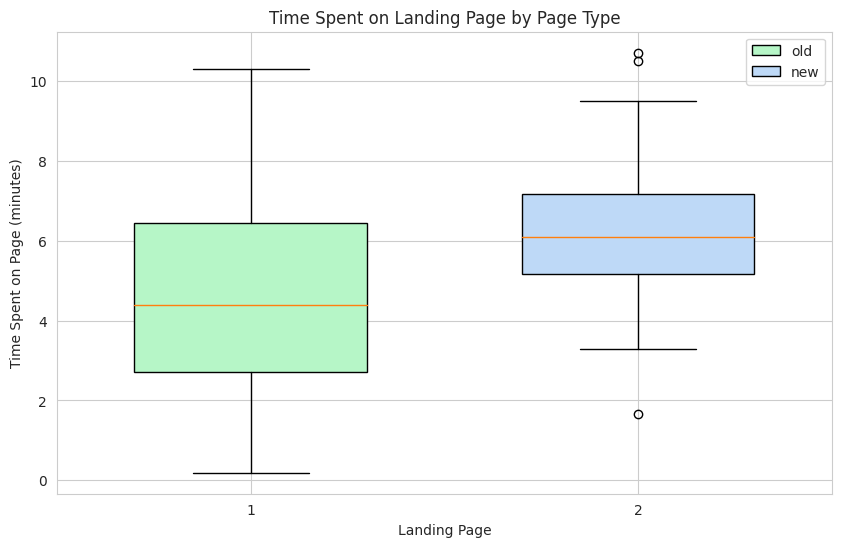

In [71]:
# Filter the data to include only the 'old' and 'new' landing pages
old_lp_data = df[df['landing_page'] == 'old']
new_lp_data = df[df['landing_page'] == 'new']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Create boxplot data for the 'old' and 'new' landing pages
old_boxplot_data = ax.boxplot(old_lp_data['time_spent_on_the_page'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#B6F6C7'))
new_boxplot_data = ax.boxplot(new_lp_data['time_spent_on_the_page'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#BED9F7'))

# Set x-axis and y-axis labels and title
ax.set_xlabel('Landing Page')
ax.set_ylabel('Time Spent on Page (minutes)')
ax.set_title('Time Spent on Landing Page by Page Type')

# Create a legend for the boxplot colors
ax.legend([old_boxplot_data["boxes"][0], new_boxplot_data["boxes"][0]], ['old', 'new'])

# Show the boxplot
plt.show()

* The median time spent on the new landing page (~ 6 minutes) appears to be more than the median time spent on the old landing page (~ 4 minutes). 
The 75th percentile of time spent on the new and old landing pages was around 6.4 minutes, meaning that 75% of users spent less than 6.4 minutes on the landing pages.
* There are 3 outliers in the new Landing page. We will further investigate these 3 outliers.

In [72]:
# Filter the data to include only the 'new' landing page
new_lp_data = df[df['landing_page'] == 'new']

# Calculate quartiles and IQR for the time_spent_on_the_page column in the filtered data
q1 = new_lp_data['time_spent_on_the_page'].quantile(0.25)
q3 = new_lp_data['time_spent_on_the_page'].quantile(0.75)
iqr = q3 - q1

# Identify outliers using the IQR rule
outliers = new_lp_data[(new_lp_data['time_spent_on_the_page'] < q1 - 1.5*iqr) | (new_lp_data['time_spent_on_the_page'] > q3 + 1.5*iqr)]

# Print the outliers
print(outliers)

    user_id      group landing_page  time_spent_on_the_page converted  \
8    546461  treatment          new                   10.71       yes   
38   546487  treatment          new                    1.65        no   
49   546473  treatment          new                   10.50       yes   

   language_preferred  
8              French  
38            Spanish  
49            English  


For the 3 outliers:

* User ID 546461 and User ID 546473 spent 10.71 minutes and 10.50 minutes repectively on the new landing page and was converted to a subscriber. These users may have found the new landing page interesting or engaging, which led them to spend more time on it and eventually convert.

* User ID 546487 spent only 1.65 minutes on the new landing page and was not converted. This user may have found the new landing page uninteresting or unengaging, which led them to spend less time on it and not convert.

#### Conversion status vs Time spent on the page

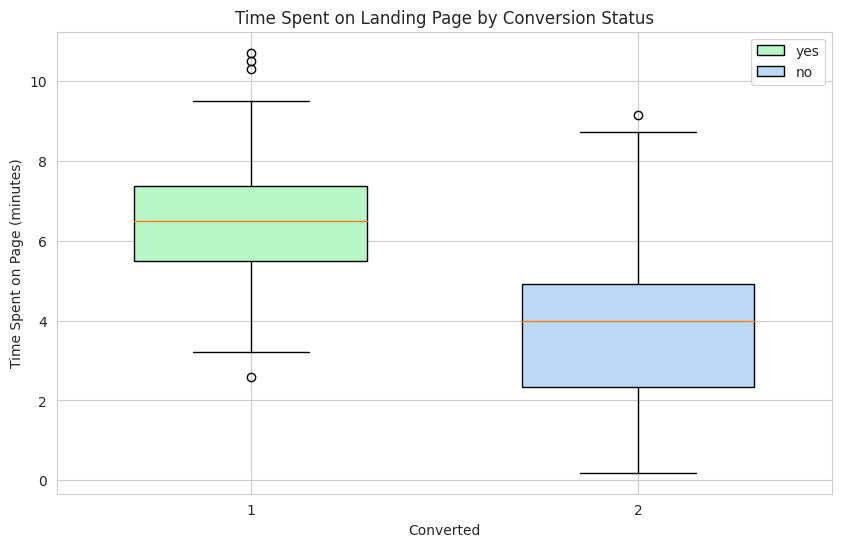

In [73]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Create boxplot data for the 'converted' values of 'yes' and 'no'
yes_boxplot_data = ax.boxplot(df[df['converted'] == 'yes']['time_spent_on_the_page'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#B6F6C7'))
no_boxplot_data = ax.boxplot(df[df['converted'] == 'no']['time_spent_on_the_page'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#BED9F7'))

# Set x-axis and y-axis labels and title
ax.set_xlabel('Converted')
ax.set_ylabel('Time Spent on Page (minutes)')
ax.set_title('Time Spent on Landing Page by Conversion Status')

# Create a legend for the boxplot colors
ax.legend([yes_boxplot_data["boxes"][0], no_boxplot_data["boxes"][0]], ['yes', 'no'])

# Show the boxplot
plt.show()

* From the above boxplot, people who spent more time (around 5.5 - 7 minutes) on page tend to be converted. Also, people who spent less time (around 2.3 - 4.5 minutes) on page tend to be not converted. 
* There are 4 outliers in the 'yes' group and 1 outlier in the 'no' group. We will further investigate them below:

In [74]:
# Identify the converted 'yes' and 'no' groups in the filtered data
converted_yes = df[df['converted'] == 'yes']
converted_no = df[df['converted'] == 'no']

# Calculate quartiles and IQR for the time_spent_on_the_page column in each group
q1_yes = converted_yes['time_spent_on_the_page'].quantile(0.25)
q3_yes = converted_yes['time_spent_on_the_page'].quantile(0.75)
iqr_yes = q3_yes - q1_yes

q1_no = converted_no['time_spent_on_the_page'].quantile(0.25)
q3_no = converted_no['time_spent_on_the_page'].quantile(0.75)
iqr_no = q3_no - q1_no

# Identify outliers using the IQR rule in each group
outliers_yes = converted_yes[(converted_yes['time_spent_on_the_page'] < q1_yes - 1.5*iqr_yes) | (converted_yes['time_spent_on_the_page'] > q3_yes + 1.5*iqr_yes)]
outliers_no = converted_no[(converted_no['time_spent_on_the_page'] < q1_no - 1.5*iqr_no) | (converted_no['time_spent_on_the_page'] > q3_no + 1.5*iqr_no)]

# Print the outliers in each group
print("Outliers in converted 'yes' group:")
print(outliers_yes)

print("Outliers in converted 'no' group:")
print(outliers_no)

Outliers in converted 'yes' group:
    user_id      group landing_page  time_spent_on_the_page converted  \
8    546461  treatment          new                   10.71       yes   
11   546546    control          old                    2.58       yes   
18   546493    control          old                   10.30       yes   
49   546473  treatment          new                   10.50       yes   

   language_preferred  
8              French  
11            English  
18            English  
49            English  
Outliers in converted 'no' group:
    user_id    group landing_page  time_spent_on_the_page converted  \
59   546574  control          old                    9.15        no   

   language_preferred  
59             French  


* Regarding the outliers, we can see that in the 'yes' group, one user from the old landing page spent only 2.58 minutes on the page and converted. This is significantly lower than the rest of the 'yes' group, as well as the median time spent on the page for the old landing page. This could indicate that this user had a particularly positive experience or was highly motivated to convert. 

* In the 'no' group, one user from the old landing page spent 9.15 minutes on the page and did not convert. This is significantly higher than the rest of the 'no' group, as well as the median time spent on the page for the old landing page. This could indicate that this user had a particularly negative experience or was having difficulty navigating the page.

#### Language preferred vs Time spent on the page

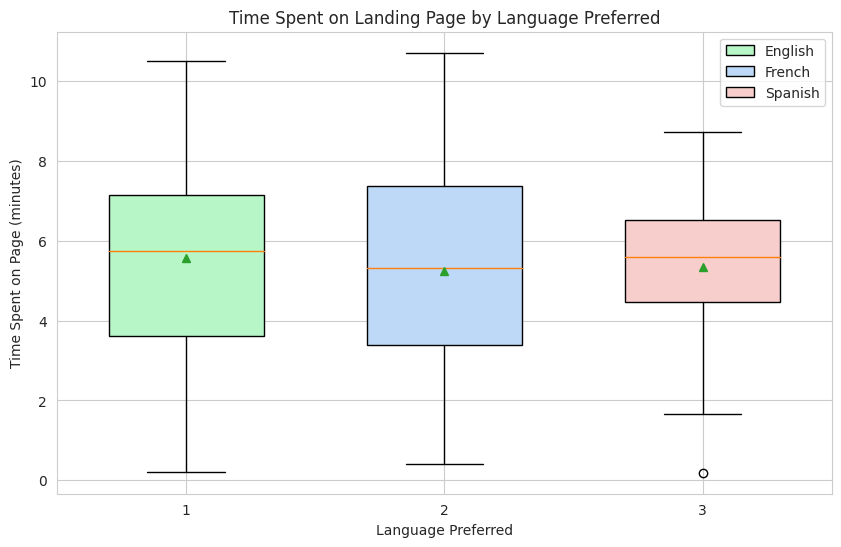

In [75]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Create boxplot data for each language group
en_boxplot_data = ax.boxplot(df[df['language_preferred'] == 'English']['time_spent_on_the_page'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#B6F6C7'), showfliers=True, showmeans=True)
fr_boxplot_data = ax.boxplot(df[df['language_preferred'] == 'French']['time_spent_on_the_page'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#BED9F7'), showfliers=True, showmeans=True)
es_boxplot_data = ax.boxplot(df[df['language_preferred'] == 'Spanish']['time_spent_on_the_page'], positions=[3], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#F8CECC'), showfliers=True, showmeans=True)

# Set x-axis and y-axis labels and title
ax.set_xlabel('Language Preferred')
ax.set_ylabel('Time Spent on Page (minutes)')
ax.set_title('Time Spent on Landing Page by Language Preferred')

# Create a legend for the boxplot colors
ax.legend([en_boxplot_data["boxes"][0], fr_boxplot_data["boxes"][0], es_boxplot_data["boxes"][0]], ['English', 'French', 'Spanish'])

# Show the boxplot
plt.show()

* From the above plot, we can see that the median time spent on the page for all three language groups (English, French, and Spanish) is relatively similar, with English having the highest median time and French having the lowest median time.

* However, there is some variability within each group, as evidenced by the standard deviation. English has the highest standard deviation (2.62), indicating that there is more variability in the time spent on the page for English speakers compared to French and Spanish speakers.

* The boxplot also shows that there is one outlier in the Spanish group with a time spent on the page of nearly 0 minutes, which is the lowest time spent on the page among all language groups. Compared to the maximum time spent on the page by users in other language groups, the maximum time spent on the page by Spanish users was the lowest.

* In terms of comparison, we can see that the distributions of time spent on the page for each language group are relatively similar, with some overlap in the interquartile ranges. Therefore, we can't conclude that language preference has a significant impact on the time spent on the page. However, we can further investigate this by conducting statistical tests such as ANOVA or t-tests below.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

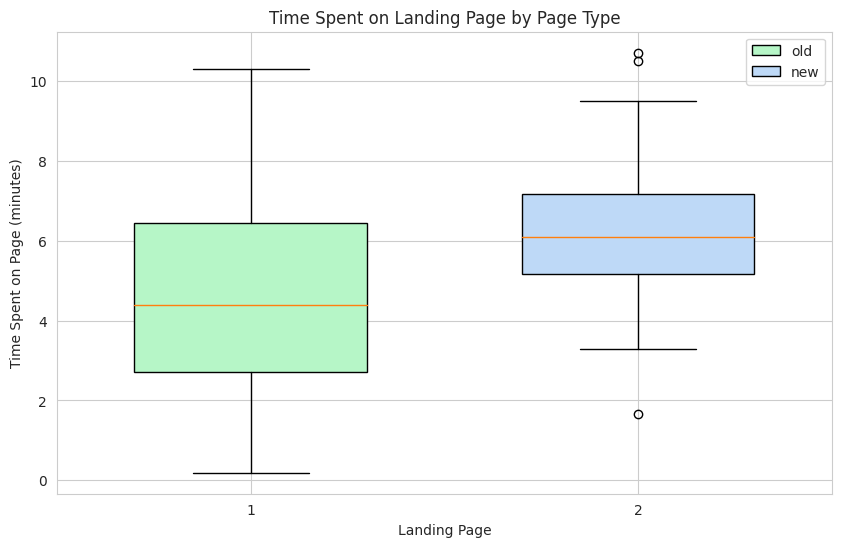

In [76]:
# Filter the data to include only the 'old' and 'new' landing pages
old_lp_data = df[df['landing_page'] == 'old']
new_lp_data = df[df['landing_page'] == 'new']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Create boxplot data for the 'old' and 'new' landing pages
old_boxplot_data = ax.boxplot(old_lp_data['time_spent_on_the_page'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#B6F6C7'))
new_boxplot_data = ax.boxplot(new_lp_data['time_spent_on_the_page'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#BED9F7'))

# Set x-axis and y-axis labels and title
ax.set_xlabel('Landing Page')
ax.set_ylabel('Time Spent on Page (minutes)')
ax.set_title('Time Spent on Landing Page by Page Type')

# Create a legend for the boxplot colors
ax.legend([old_boxplot_data["boxes"][0], new_boxplot_data["boxes"][0]], ['old', 'new'])

# Show the boxplot
plt.show()

The boxplot above suggests that the median time spent on the new landing page is higher than the median time spent on the old landing page. To further investigate this observation, we will conduct a statistical test below.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the the mean time spent on the new landing page and  the mean time spent on the existing landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Based on this information, we will use a **Two Independent Sample T-test**. Now, we will use Shapiro-Wilk’s test to check whether the 'time_spent_on_the_page' variable for both the control and treatment groups follows a normal distirbution or not.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the page for control group/ treatment group follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the page fro control group/ treatment group does not follow a normal distribution

In [77]:
from scipy.stats import shapiro

# Subset the data for control group and treatment group
control_df = df[df['group'] == 'control']
treatment_df = df[df['group'] == 'treatment']

# Perform Shapiro-Wilk's test on control group
control_sw = shapiro(control_df['time_spent_on_the_page'])
print("Shapiro-Wilk's test result for control group:", control_sw)

# Perform Shapiro-Wilk's test on treatment group
treatment_sw = shapiro(treatment_df['time_spent_on_the_page'])
print("Shapiro-Wilk's test result for treatment group:", treatment_sw)


Shapiro-Wilk's test result for control group: ShapiroResult(statistic=0.9776089191436768, pvalue=0.45611920952796936)
Shapiro-Wilk's test result for treatment group: ShapiroResult(statistic=0.9857664704322815, pvalue=0.8040016293525696)


Since p-value (~0.456 and ~0.804) of the test is much greater than the level of significance ($\alpha = 0.05$), we **fail to reject the null hypothesis** that the response follows the normal distribution. Therefore, we can conclude that the time_spent_on_the_page variable for both the control and treatment groups **follow a normal distribution**.

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spending on the page is measured on a continuous scale.
* Normally distributed populations - Yes, we proved that the time_spent_on_the_page variable for both the control and treatment groups follow a normal distribution via Shapiro-Wilk’s test.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different. (We prove that the standard deviations of samples are different in the step 4 below)
* Random sampling from the population - Yes, the Data Science team randomly selected 100 users as simple random samples.

We can use **two Independent Sample T-test** for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [78]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [79]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


As the result shows that there is a significant difference of standard deviation of time spent between the new and old landing pages, we will use a **two Independent Sample T-test for Equality of Means - Unequal Std Dev** to test.

### Step 5: Calculate the p-value

In [80]:
from scipy.stats import ttest_ind

# calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater') 

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [81]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.00013) is much less than the level of significance ($\alpha = 0.05$), we can **reject the null hypothesis**. Hence, we do have enough evidence to support the claim that **users spend more time on the new landing page than the existing landing page**.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

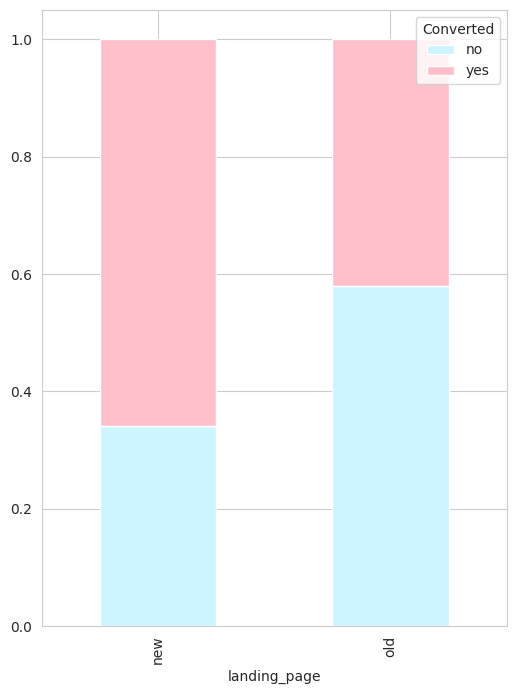

In [82]:
# create the crosstab and plot the bar chart
ct = pd.crosstab(df['landing_page'], df['converted'], normalize='index')
ct.plot(kind='bar', figsize=(6,8), stacked=True, color=['#ccf5ff', '#FFC0CB'])

# add legend and show the plot
plt.legend(title='Converted', loc='upper right')
plt.show()

Based on the bar chart, it appears that the number of converted users for the new landing page is higher than that for the old landing page. To confirm this, we will perform further testing below.

In [83]:
df.groupby(['landing_page', 'converted']).size()

landing_page  converted
new           no           17
              yes          33
old           no           29
              yes          21
dtype: int64

### Step 1: Define the null and alternate hypotheses

<p>Let $p_1$ and $p_2$ be the proportions of users who visit the new landing page and get converted, and the proportions of users who visit the old landing page and get converted, respectively.</p>

<p>We will test the null hypothesis:</p>

$$H_0: p_1 \leq p_2$$

<p>against the alternative hypothesis:</p>

$$H_a: p_1 > p_2$$

<p>where $p_1$ represents the conversion rate for the new landing page and $p_2$ represents the conversion rate for the old landing page.</p>

<p>We will use hypothesis testing to determine whether there is sufficient evidence to reject the null hypothesis and accept the alternative hypothesis.</p>


### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, we will use a Two Proportion Z-test.

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [84]:
# Create an array of converted user counts for old and new pages
converted_counts = np.array([len(df.loc[(df.landing_page == 'old') & (df.converted == 'yes')]), 
                            len(df.loc[(df.landing_page == 'new') & (df.converted == 'yes')])])

# Create and array of sample sizes - we know sample sizes from problem statement
sample_sizes = np.array([50, 50])

### Step 5: Calculate the p-value

In [85]:
# Import proportions_ztest() function from statsmodels.stats.proportion library
from statsmodels.stats.proportion import proportions_ztest

# Calculate p-value using ttest_ind()
test_stat, p_value = proportions_ztest(converted_counts, sample_sizes)

print('The p-value is found to be', p_value) # print p-value

The p-value is found to be 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

In [86]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.016) is less than the level of significance ($\alpha = 0.05$), we can **reject the null hypothesis**. Hence, we do have enough evidence to support the claim that **the conversion rate for the new page is greater than the conversion rate for the old page**.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

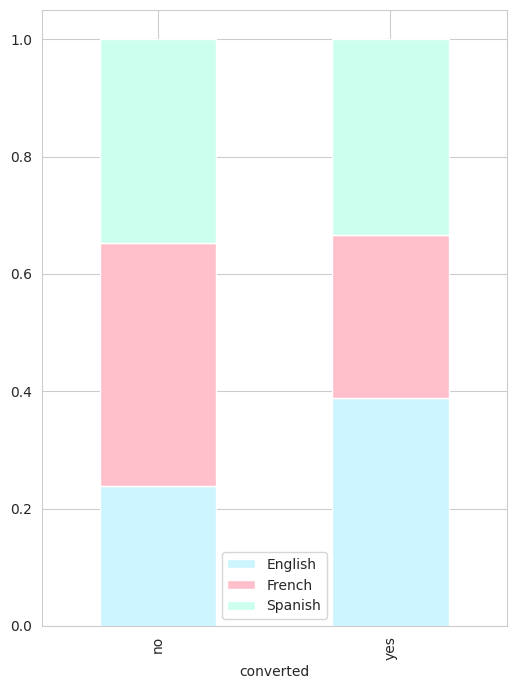

In [87]:
pd.crosstab(df['converted'], df['language_preferred'], normalize='index').plot(kind="bar", figsize=(6,8), stacked=True, color=['#ccf5ff', '#FFC0CB', '#ccffee'])
plt.legend()
plt.show()

Based on the above bar chart, it seems that the conversion rate for French users is relatively lower compared to users of other languages. To confirm this observation, we will conduct further statistical tests.

### Step 1: Define the null and alternate hypotheses


The null hypothesis for testing the independence of conversion status and preferred language would be:

$H_0:$ Conversion status and preferred language are independent

The alternate hypothesis would be:

$H_a:$ Conversion status and preferred language are not independent

### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, we will use Chi-Square Test for Independence.**

#####Let's test whether the assumptions are satisfied or not


* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, the Data Science team randomly selected 100 users as simple random samples.

We can use the Chi-square test for independence.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [88]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [89]:
from scipy.stats import chi2_contingency  

# calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [90]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference
As the p-value (~0.21) is greater than the level of significance ($\alpha = 0.05$), we **fail to reject the null hypothesis**. Hence, we can conclude that there is not enough evidence to suggest a relationship between the conversion and preferred language variables. In other words, the data suggests that **the conversion status and preferred language are independent of each other.**

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

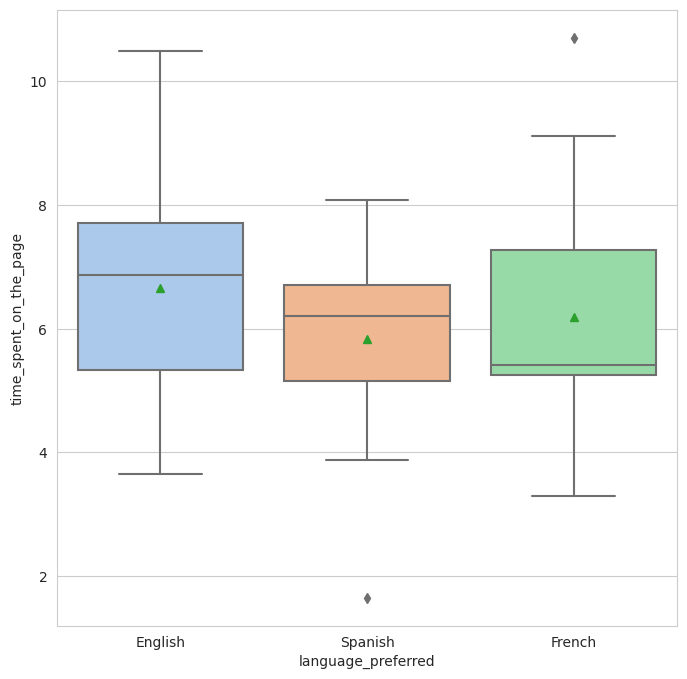

In [91]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

# set the color palette
palette = 'pastel'

# create the boxplot
plt.figure(figsize=(8,8))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', showmeans=True, data=df_new, palette=palette)
plt.show()

Based on the above box plot, it seems that the means of time spent on the page for English, Spanish, and French users are relatively close to each other. To confirm this, we will conduct a test below.

In [92]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the page for users who prefer English, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one preferred language's users' time spent on the page is different from the rest.

### Step 2: Select Appropriate test

This is a problem concerning three population means. We will use the **Shapiro-Wilk's test** to check if the 'time_spent_on_the_page' variable follows a normal distribution and use the **Levene's test** to check the homogeneity of variances. If we can satisfy these assumption, we will use the **one way ANNOVA F-Test** to compare the three population means.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the page does not follow a normal distribution

In [93]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643193125724792


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [94]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['language_preferred']=="English"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="French"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.
* Samples are independent simple random samples - Yes, the Data Science team randomly selected 100 users as simple random samples.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [95]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']   

### Step 5: Calculate the p-value

In [96]:
from scipy.stats import f_oneway

# calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [97]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.43) is greater than the level of significance ($\alpha = 0.05$), we **fail to reject the null hypothesis**. Hence, we can conclude that there is not enough evidence to suggest the mean time spent on the new page is different for at least one language user. In other words, the data suggests that **the mean time spent on the new page is the same for all language users.**

## Conclusion and Business Recommendations

####Conclusion
-  We randomly selected 100 users and divided them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). From the sample data, we observed that
  - approximately 68% of users spent between 3.88 - 7.02 minutes on the page, with some spending more or less time.
  - The conversion rate of the news portal, which refers to the proportion of users who become subscribers, is 54%.
  - people who spent more time (around 5.5 - 7 minutes) on page tend to be converted to a subscriber. On the other hand, people who spent less time (around 2.3 - 4.5 minutes) on page tend to be not converted to a subscriber.
  - the median time spent on the page for all three language groups (English, French, and Spanish) is relatively similar, with English having the highest median time and French having the lowest median time.

- Based on our observations andd testing results, we can conclude that the new landing page can attract users to spend more time on the page and the conversion rate is greater than before.

  - As the p-value (~0.00013) is much less than the level of significance ($\alpha = 0.05$), we do have enough evidence to support the claim that users spend more time on the new landing page than the old landing page.

  - As the p-value (~0.016) is less than the level of significance ($\alpha = 0.05$), we do have enough evidence to support the claim that the conversion rate for the new page is greater than the conversion rate for the old page.

- There is not enough statistical evidence to show that language with affect the time spent on the page and the conversion rate.

  - As the p-value (~0.21) is greater than the level of significance ($\alpha = 0.05$), we can conclude that there is not enough evidence to suggest a relationship between the conversion and preferred language variables. In other words, the data suggests that the conversion status and preferred language are independent of each other.

  - As the p-value (~0.43) is greater than the level of significance ($\alpha = 0.05$), we can conclude that there is not enough evidence to suggest the mean time spent on the new page is different for at least one language user. In other words, the data suggests that the mean time spent on the new page is the same for all language users.

####Business Recommendations
- Implementing the new landing page
  - Implement the new landing page as it attracts users to spend more time on the page and the conversion rate is greater than before.
- Monitoring and analyzing user behavior
  - Continue to monitor the time spent on the page and the conversion rate to identify any changes or trends that may arise over time.
  - Consider conducting further studies to identify the factors that influence conversion rates and time spent on the page, such as user demographics, interests, or other aspects of the user experience.
  - Consider obtaining user feedback on the new landing page. This will provide valuable insights into what users like and dislike about the new page, and can help identify areas for improvement.
- Improving the user experience
  - Focus on improving the overall user experience on the landing page, including page load speed, ease of navigation, and readability of content. This can help improve user engagement and conversion rates.
  - With the increasing use of mobile devices, it is important to ensure that the landing page is optimized for mobile users. This can include using responsive design, optimizing images, and minimizing page load times.
- Language-specific strategies
  - Since language does not appear to have an impact on the time spent on the page and the conversion rate, there may not be a need to develop language-specific pages or marketing campaigns. However, it may be worthwhile to continue to monitor user preferences and adjust strategies as needed.






___